
What company are you looking for?  NASDAQ


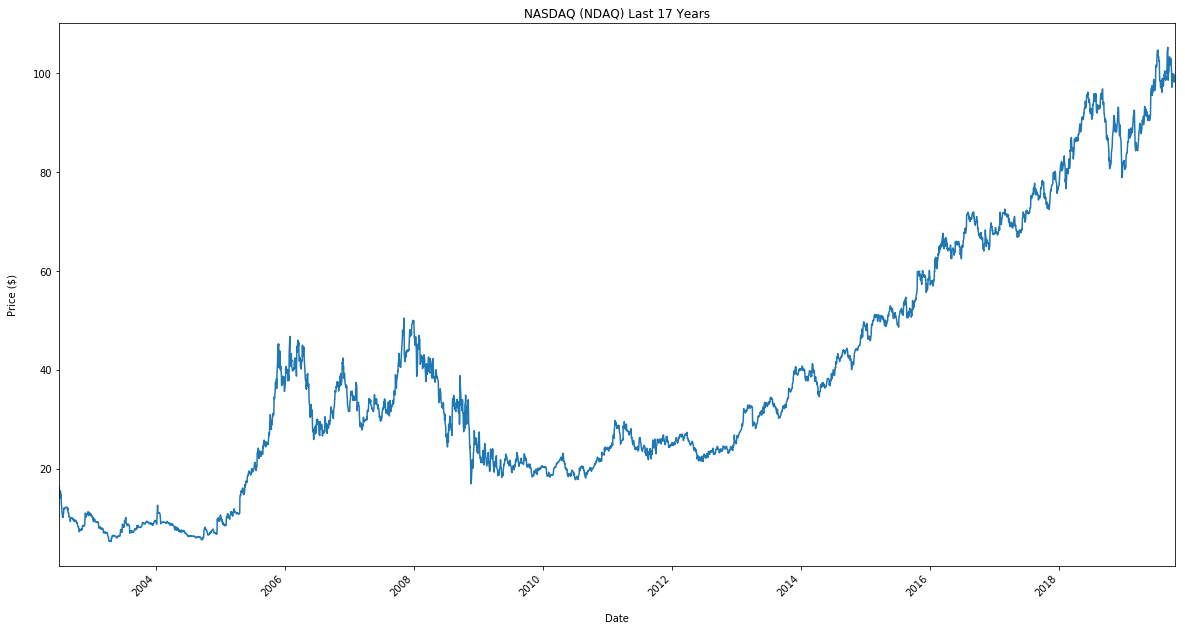

In [42]:
# Dependencies
import json
import pandas as pd
import warnings
import requests 
import datetime as dt
from config import key
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

mytime = dt.datetime.now()

option = 'y'
while option == 'y':
    
    try:
        company = input("\nWhat company are you looking for? ")

        search_url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={company}&apikey={key}'

        response = requests.get(search_url).json()

        symbol = response['bestMatches'][0]['1. symbol']
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={key}"

        # Make request and store response
        response = requests.get(url)

        # Print status code
        response = response.json()

        myhigh = []
        for item in response['Time Series (Daily)']:
            myhigh.append(float(response['Time Series (Daily)'][item]["2. high"]))

        times = []
        for item in response['Time Series (Daily)']:
            times.append(item)
        
        flag = 0
        mystart = int(times[-1].split("-")[0])
        mydiff = int(mytime.strftime("%d-%m-%Y").split("-")[2]) - mystart
        
        if mydiff == 0:
            flag = 1
            mystart = int(times[-1].split("-")[1])
            mydiff = int(mytime.strftime("%d-%m-%Y").split("-")[1]) - mystart
        
        mydatetimes = []
        for item in times:
            mydatetimes.append(pd.to_datetime(item))

        plt.figure(figsize=(20,10))
        plt.plot(mydatetimes,myhigh)
        plt.xlim(min(mydatetimes),max(mydatetimes))
        plt.xticks(rotation = 45, ha = 'right')
        if flag == 0:
            plt.title(f"{company} ({symbol}) Last {mydiff} Years")
        else: 
            plt.title(f"{company} ({symbol}) Last {mydiff} Months")
        plt.xlabel('\nDate')
        plt.ylabel('Price ($)\n')
        plt.show()
        option = 'n'
        
    except (KeyError, IndexError):
        print("\n\nSorry couldn't find that one. :/\n")
        option = input("Try again? (y/n) ")